In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
# Uploading prepared data from files
X = pd.read_pickle('prepared_X.pkl')
y = pd.read_pickle('prepared_y.pkl')
print("The prepared data has been uploaded successfully.")

The prepared data has been uploaded successfully.


In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Finding the index of the 'Surface' column automatically
categorical_features = ['Surface']
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

# --- Сonfiguring and train the preprocessor on the training data ---
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_indices)
    ],
    remainder='passthrough'
)

x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

In [5]:
# --- 5.1. Model Training: Logistic Regression (Baseline) ---

# We start with a simple linear model as our baseline. 
# This gives us a starting point to see if more complex models provide any benefit.

# 1. Initialize the model
# We use max_iter=1000 to ensure the model has enough iterations to converge.
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train the model on the encoded training data
model_lr.fit(x_train_encoded, y_train)

# 3. Make predictions on the unseen test data
predictions_lr = model_lr.predict(x_test_encoded)

# 4. Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, predictions_lr)

print(f"The accuracy of the Logistic Regression model is: {accuracy_lr:.4f}")

The accuracy of the Logistic Regression model is: 0.6973


In [6]:
# --- 5.2. Model Training: Decision Tree Classifier --

# 1. Initialize the model
# We set max_depth=4 to prevent overfitting and random_state for reproducibility.
model_tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# 2. Train the model on the encoded training data
model_tree.fit(x_train_encoded, y_train)

# 3. Make predictions on the unseen test data
predictions_tree = model_tree.predict(x_test_encoded)

# 4. Evaluate the model's performance
accuracy_tree = accuracy_score(y_test, predictions_tree)

print(f"The accuracy of the Decision Tree model is: {accuracy_tree:.4f}")

The accuracy of the Decision Tree model is: 0.6982


In [7]:
# --- 5.3. Model Training: XGBoost Classifier ---

# Finally, we test a powerful gradient boosting model, which is often a top performer 
# on tabular data. This will show us the potential "ceiling" of performance with our current features.

# 1. Initialize the model
# We set key hyperparameters like n_estimators and learning_rate for control.
# `eval_metric` is set to 'logloss' for better internal evaluation during training.
model_xgb = XGBClassifier(n_estimators=72, learning_rate=0.006, random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Train the model on the encoded training data
model_xgb.fit(x_train_encoded, y_train)

# 3. Make predictions on the unseen test data
predictions_xgb = model_xgb.predict(x_test_encoded)

# 4. Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, predictions_xgb)

print(f"The accuracy of the XGBoost model is: {accuracy_xgb:.4f}")

The accuracy of the XGBoost model is: 0.7002


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:41:57] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [8]:
cm = confusion_matrix(predictions_xgb, y_test)
print(cm)

[[3552 1507]
 [1505 3483]]


Text(45.722222222222214, 0.5, 'Actual results')

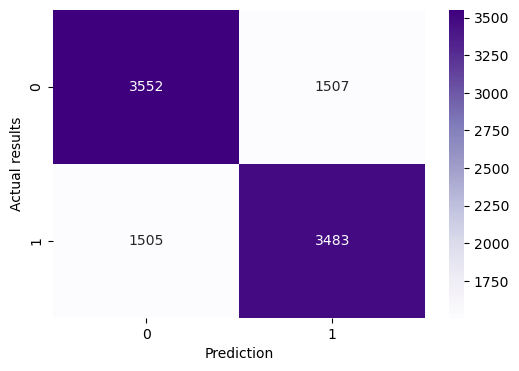

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Prediction')
plt.ylabel('Actual results')
